<a href="https://colab.research.google.com/github/Edgar-Avila/inteligencia-computacional/blob/main/regresion-lineal-multivariable/RegresionLinealMultivariable.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multi Variable Linear Regression
Assignment for the "Computational Intelligence" course (UNA-Puno)
## Getting the houses.txt file

In [224]:
!wget https://raw.githubusercontent.com/Edgar-Avila/inteligencia-computacional/main/regresion-lineal-multivariable/houses.txt

--2024-01-24 22:55:38--  https://raw.githubusercontent.com/Edgar-Avila/inteligencia-computacional/main/regresion-lineal-multivariable/houses.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12500 (12K) [text/plain]
Saving to: ‘houses.txt.3’

houses.txt.3        100%[===================>]  12.21K  --.-KB/s    in 0.002s  

2024-01-24 22:55:38 (5.87 MB/s) - ‘houses.txt.3’ saved [12500/12500]



## Reading the data

In [225]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [226]:
y_column_name = "Price (1000s dollars)"
names = ["Size (sqft)", "Number of Bedrooms", "Number of Floors", "Age of Home", y_column_name]
dataset_path = "houses.txt"
dataset = pd.read_csv(dataset_path, names=names)
features = dataset.drop(columns=[y_column_name]).values
ys = dataset[y_column_name].values
m, n = features.shape
m, n

(100, 4)

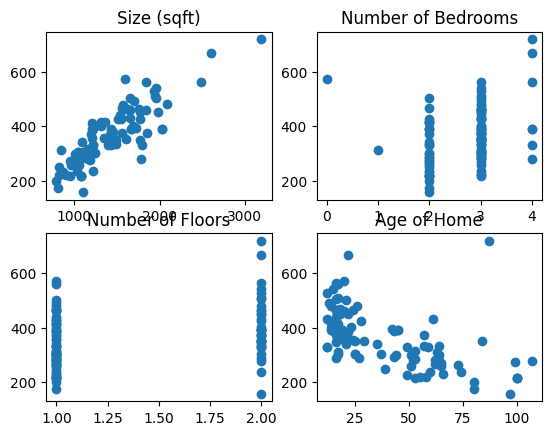

In [227]:
_, subplots = plt.subplots((n+1)//2, 2)
for i in range(n):
  name = names[i]
  subplot = subplots[i // 2, i%2]
  subplot.set_title(name)
  subplot.scatter(features[:, i], ys)
plt.show()

## Normalizing the data

In [228]:
# Comparing this with sklearn.preprocessing.StandardScaler
class ZScoreNormalizer:
  # This would be "fit"
  def __init__(self, feats):
    self.mean = np.mean(feats, axis=0)
    self.std = np.std(feats, axis = 0)

  # This is "transform"
  def transform(self, feats):
    return (feats - self.mean) / self.std

zscore = ZScoreNormalizer(features) # Just initializing the data, it is not yet transformed

In [229]:
normalized = zscore.transform(features)
normalized

array([[-1.12018542, -1.08793896, -0.78288136,  1.02191098],
       [-0.41174475,  0.44436943, -0.78288136,  0.98312878],
       [ 1.29385043,  0.44436943,  1.27733275, -0.83963464],
       [ 0.75524143,  0.44436943,  1.27733275,  0.12992037],
       [ 1.32296443,  0.44436943,  1.27733275, -0.91719904],
       [-0.24191308, -1.08793896, -0.78288136, -0.95598124],
       [-1.33368809, -1.08793896, -0.78288136,  1.06069319],
       [ 1.02454593,  0.44436943, -0.78288136, -0.83963464],
       [-0.94064908,  0.44436943, -0.78288136,  0.16870257],
       [ 4.31928028,  1.97667783,  1.27733275,  1.8751194 ],
       [-1.51807676, -1.08793896, -0.78288136,  1.60364399],
       [-0.51849608, -1.08793896,  1.27733275, -0.83963464],
       [ 0.34764542, -1.08793896, -0.78288136, -0.80085244],
       [ 0.03952226,  0.44436943, -0.78288136, -0.72328804],
       [-0.46997275, -1.08793896, -0.78288136, -0.91719904],
       [-0.78052208, -1.08793896, -0.78288136,  0.98312878],
       [-1.37250675, -2.

## Linear Regression done manually

In [230]:
def func(xs, ws, b):
  ans = np.dot(xs, ws) + b
  return ans

def l2(xs, ws, b, y):
  return (func(xs, ws, b) - y) ** 2

def cost(features, ys, ws, b):
  ans = 0
  for i in range(m):
    ans += l2(features[i], ws, b, ys[i])
  ans /= 2*m
  return ans

def w_derivative(ws, b, features, ys):
  f = features @ ws + b           # f(x)
  err = f - ys                    # f(x) - y
  return (features.T @ err) / m   # (f(x) - y) * x[i] -> Array

def b_derivative(ws, b, features, ys):
  f = features @ ws + b   # f(x)
  err = f - ys            # f(x) - y
  return np.sum(err) / m  # (f(x) - y) -> Scalar

def gradient(alpha, iterations, features, ys):
  ws = np.zeros(n)
  b = 0
  current_cost = cost(features, ys, ws, b)
  history = [[current_cost, *ws, b]]
  for _ in range(iterations):
    wd, bd = w_derivative(ws, b, features, ys), b_derivative(ws, b, features, ys)
    ws = ws - alpha * wd
    b = b - alpha * bd
    current_cost = cost(features, ys, ws, b)
    history.append([current_cost, *ws, b])
  df = pd.DataFrame(history, columns=["cost", "w0", "w1", "w2", "w3", "b"])

  return (ws, b, df)

In [231]:
ws, b, history = gradient(0.1, 1000, normalized, ys)
history

,cost,w0,w1,w2,w3,b
0,71024.092067,0.000000,0.000000,0.000000,0.000000,0.000000
1,57326.417079,8.915880,3.019135,3.327469,-5.993265,36.223952
2,46397.978472,16.409052,5.076916,5.551667,-11.062590,68.825509
3,37644.397211,22.766931,6.396236,6.923426,-15.366326,98.166910
4,30610.453378,28.216346,7.151193,7.639585,-19.032943,124.574171
...,...,...,...,...,...,...
996,219.711302,110.613352,-21.473239,-32.660703,-37.779384,362.239520
997,219.711302,110.613352,-21.473239,-32.660703,-37.779384,362.239520
998,219.711302,110.613352,-21.473239,-32.660703,-37.779384,362.239520
999,219.711302,110.613352,-21.473239,-32.660703,-37.779384,362.239520


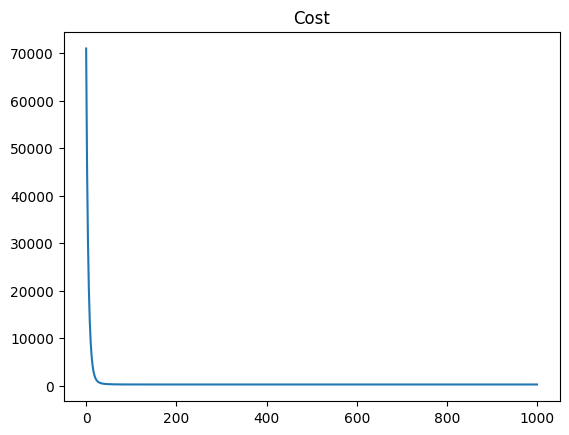

In [232]:
plt.title('Cost')
plt.plot(history['cost'])
plt.show()

In [233]:
def predict_manual(inputs):
  size = len(inputs)
  predictions = np.zeros(size)
  for i in range(size):
    prediction = func(inputs[i], ws, b)
    predictions[i] = prediction
  return predictions

## Linear Regression with scikit-learn

In [234]:
scikit_model = LinearRegression()
scikit_model.fit(normalized, ys)

LinearRegression()

## Results
- If we manually enter the same values [to the manual model](#scrollTo=bLATggyi-E-k&line=1&uniqifier=1) and [the scikit model](#scrollTo=rBCJbiz7-k1V&line=1&uniqifier=1), we'll get the same results

- In both
[the result of the manual prediction](#scrollTo=4mWMwNruC0BN&line=1&uniqifier=1) and
[the result of the scikit prediction](#scrollTo=fCxoEjM5C3aR&line=2&uniqifier=1), the predicted values are the same.

- The same happens with [both plots](#scrollTo=jp1W69oNDTkV&line=17&uniqifier=1), there is no visible difference

- When comparing the accuracy using scikit mean_squared_error, both [the manual one](#scrollTo=mWpmYTuRHl41&line=1&uniqifier=1) and [the one using scikit](#scrollTo=5j6yYJCDJH3M&line=1&uniqifier=1) give the same result.

🎉🎉 Multi variable linear regression was successfuly implemented 🎉🎉


### Trying out a new value

In [235]:
def ask_and_predict(predict_func):
    data = np.zeros((1, n))
    for i in range(n):
      name = names[i]
      data[0][i] = float(input(f'{name}: '))

    prediction = predict_func(zscore.transform(data))[0]
    print(f'A house with those feature will likely cost around {prediction:.2f} 1000s of dollars')

In [236]:
# ask_and_predict(predict_manual) # Commented so that we can run all cells without stopping

In [237]:
# ask_and_predict(scikit_model.predict) # Commented so that we can run all the cells without stopping

### Predicting the train data

In [238]:
manual_prediction = predict_manual(normalized)
manual_prediction

array([248.65591798, 295.58045873, 485.81689524, 389.61035726,
       491.96762765, 420.52811442, 223.57450463, 523.31626324,
       267.84509755, 685.00447351, 182.66630919, 318.25079707,
       479.88048606, 409.96399029, 393.83650249, 287.69238564,
       323.97747981, 405.90878584, 436.31413687, 270.13705992,
       500.97979389, 329.10878125, 388.16122321, 552.41859037,
       242.3019055 , 295.69011978, 283.12331913, 217.52238166,
       491.06890089, 229.84738873, 341.18908562, 291.69315602,
       489.92233626, 239.03010489, 597.95447816, 384.07367102,
       452.70618447, 401.4470128 , 405.86539494, 173.12727791,
       423.54102555, 434.16299105, 277.3044564 , 229.84738873,
       448.56536512, 488.89226144, 332.01742952, 465.74081655,
       222.41425711, 386.76114193, 456.59466253, 370.7813079 ,
       469.12413346, 310.3417961 , 426.44966536, 392.08127297,
       347.54993532, 339.61307315, 471.54323795, 243.74234709,
       298.2466504 , 273.2843497 , 250.25244212, 297.97

In [239]:
scikit_prediction = scikit_model.predict(normalized)
scikit_prediction

array([248.65591798, 295.58045873, 485.81689524, 389.61035726,
       491.96762765, 420.52811442, 223.57450463, 523.31626324,
       267.84509755, 685.00447351, 182.66630919, 318.25079707,
       479.88048606, 409.96399029, 393.83650249, 287.69238564,
       323.97747981, 405.90878584, 436.31413687, 270.13705992,
       500.97979389, 329.10878125, 388.16122321, 552.41859037,
       242.3019055 , 295.69011978, 283.12331913, 217.52238166,
       491.06890089, 229.84738873, 341.18908562, 291.69315602,
       489.92233626, 239.03010489, 597.95447816, 384.07367102,
       452.70618447, 401.4470128 , 405.86539494, 173.12727791,
       423.54102555, 434.16299105, 277.3044564 , 229.84738873,
       448.56536512, 488.89226144, 332.01742952, 465.74081655,
       222.41425711, 386.76114193, 456.59466253, 370.7813079 ,
       469.12413346, 310.3417961 , 426.44966536, 392.08127297,
       347.54993532, 339.61307315, 471.54323795, 243.74234709,
       298.2466504 , 273.2843497 , 250.25244212, 297.97

### Plotting both results

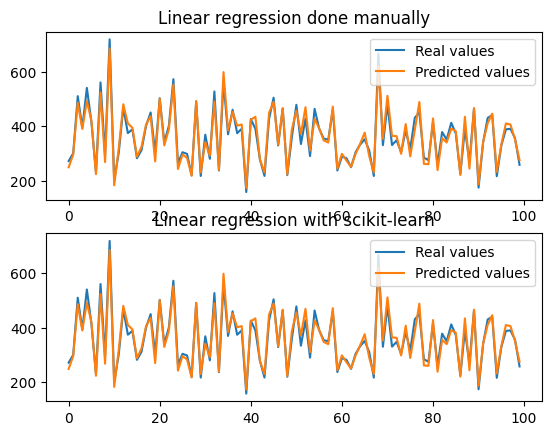

In [251]:
_, subplots = plt.subplots(2)
manual_plot = subplots[0]
scikit_plot = subplots[1]

manual_plot.set_title("Linear regression done manually")
manual_plot_real, = manual_plot.plot(ys)
manual_plot_predicted, = manual_plot.plot(manual_prediction)
manual_plot_real.set_label("Real values")
manual_plot_predicted.set_label("Predicted values")
manual_plot.legend()

scikit_plot.set_title("Linear regression with scikit-learn")
scikit_plot_real, = scikit_plot.plot(ys)
scikit_plot_predicted, = scikit_plot.plot(scikit_prediction)
scikit_plot_real.set_label("Real values")
scikit_plot_predicted.set_label("Predicted values")
scikit_plot.legend()

plt.show()

### Mean squared error of both models

In [242]:
mean_squared_error(ys, manual_prediction)

439.4226035299238

In [243]:
mean_squared_error(ys, scikit_prediction)

439.4226035299241